<center>
<font size=5px><b>
Challenge Set 6
</font>
</center>

| Topic:    | Classification Errors |
| :-------- | --------------------: |
| Student:  | Max Farago            |
| Date Due: | 08/01/2016            |

### Challenge 1

__For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set)__

In [40]:
import pandas as pd
import numpy as np

In [41]:
vList = ["Vote_" + str(i) for i in range(1,17)]
df = pd.read_csv("house-votes-84.data", names = vList)
df.replace(['y', 'n'], [1, 0], inplace=True)
for col in df.columns.values:
    df[col].replace('?', round(df[df[col] != "?"][col].mean(), 1), inplace=True)
df.head()

,Vote_1,Vote_2,Vote_3,Vote_4,Vote_5,Vote_6,Vote_7,Vote_8,Vote_9,Vote_10,Vote_11,Vote_12,Vote_13,Vote_14,Vote_15,Vote_16
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.4,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.8
democrat,0.4,1.0,1.0,0.4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.4,1.0,1.0,1.0,1.0


In [42]:
from sklearn.cross_validation import train_test_split

In [190]:
ydata = [x for x in list(df.index.values)]
xdata = np.array([df.iloc[y].values for y in range(len(ydata))])
xTrain, xTest, yTrain, yTest = train_test_split(xdata, ydata, test_size=0.30, random_state=4444)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [192]:
modelKNN = KNeighborsClassifier(10)
modelLR = LogisticRegression()
modelGNB = GaussianNB()
modelSVM = SVC()
modelDT = DecisionTreeClassifier()
modelRF = RandomForestClassifier()

In [193]:
cDict = {"KNN":[modelKNN], "LR":[modelLR], "GNB":[modelGNB], "SVM":[modelSVM], "DT":[modelDT], "RF":[modelRF]}

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pprint

In [227]:
for key, value in cDict.iteritems():
    cDict[key].append([
        accuracy_score(yTest, value[0].fit(xTrain, yTrain).predict(xTest)),
        precision_score(yTest, value[0].fit(xTrain, yTrain).predict(xTest), average=None),
        recall_score(yTest, value[0].fit(xTrain, yTrain).predict(xTest), average=None),
        f1_score(yTest, value[0].fit(xTrain, yTrain).predict(xTest), average=None)])

### Challenge 2
__For each, draw the ROC curve and calculate the AUC__

In [196]:
from sklearn.metrics import roc_curve, auc

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")

KNN 0.92772967773
SVM 0.949975949976
GNB 0.928691678692
RF 0.965728715729
LR 0.931457431457
DT 0.949975949976


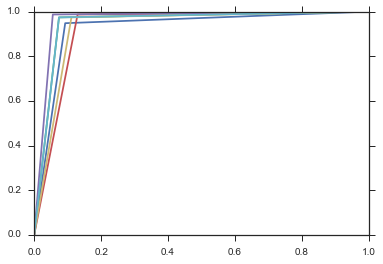

In [198]:
yTestBin = [ 1 if x == 'democrat' else 0 for x in yTest]
for key in cDict.keys():
    xTestBin = [ 1 if x == 'democrat' else 0 for x in cDict[key][0].fit(xTrain, yTrain).predict(xTest)]
    fpr, tpr, thr = roc_curve(yTestBin, xTestBin)
    plt.plot(fpr, tpr, '-')
    print key, auc(fpr, tpr)

### Challenge 3
__Calculate the same metrics  in a cross validation scheme with the cross_val_score function__

In [199]:
from sklearn.cross_validation import cross_val_score

In [200]:
for x, y in cDict.iteritems():
    cDict[x][1].append(np.mean(cross_val_score(estimator=y[0], X=xdata, y=ydata)))
    print x, cDict[x][1][-1:]

KNN [0.92873563218390809]
SVM [0.95402298850574718]
GNB [0.93103448275862066]
RF [0.96551724137931039]
LR [0.96321839080459759]
DT [0.94482758620689655]


### Challenge 4
__For your movie classifiers, calculate the precision and recall for each class__

In [8]:
df2 = pd.read_csv("../../../challenges_data/2013_movies.csv")
df2.Budget.replace(np.nan, df2.Budget.mean(), inplace=True)
df2.DomesticTotalGross.replace(np.nan, df2.Budget.mean(), inplace=True)
df2.Runtime.replace(np.nan, df2.Budget.mean(), inplace=True)
df2.dropna(inplace=True)
df2

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,1.300000e+08,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,2.000000e+08,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,1.500000e+08,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,7.600000e+07,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,2.250000e+08,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,1.000000e+08,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,7.474719e+07,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,7.474719e+07,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,1.600000e+08,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,2.150000e+08,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


In [31]:
ydata2 = df2.Rating
xdata2 = np.array([ df2.drop(["Title", "Rating", "Director", "ReleaseDate"], axis=1).iloc[x] for x in range(len(ydata2)) ])
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(xdata2, ydata2, test_size=0.30, random_state=4444)

In [36]:
print yTrain2.value_counts()

PG-13    31
R        26
PG        9
G         1
Name: Rating, dtype: int64


In [39]:
modelKNN2 = KNeighborsClassifier()
modelLR2 = LogisticRegression()
print "KNN"
print precision_score(yTest2, modelKNN2.fit(xTrain2, yTrain2).predict(xTest2), average=None)
print recall_score(yTest2, modelKNN2.fit(xTrain2, yTrain2).predict(xTest2), average=None)
print "LogReg" 
print precision_score(yTest2, modelLR2.fit(xTrain2, yTrain2).predict(xTest2), average=None)
print recall_score(yTest2, modelLR2.fit(xTrain2, yTrain2).predict(xTest2), average=None)

KNN
[ 0.          0.61538462  0.57142857]
[ 0.          0.57142857  0.8       ]
LogReg
[ 0.   0.   0.5  0.5]
[ 0.          0.          0.85714286  0.2       ]


### Challenge 5
__Draw the ROC curve and calculate AUC for the logistic regression classifier from challenge 12__

In [206]:
df3 = pd.read_csv("haberman.data", names = ["patientAge", "opYear", "numNodes", "survStat"])
df3.head()

,patientAge,opYear,numNodes,survStat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [207]:
ydata3 = df3.survStat
xdata3 = np.array([ df3.drop("survStat", axis=1).iloc[x] for x in range(len(ydata3)) ])
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(xdata3, ydata3, test_size=0.30, random_state=4444)

In [217]:
modelLR3 = LogisticRegression()
modelLR3.fit(xTrain3, yTrain3).predict(xTest3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [221]:
yTest3Bin = [ 1 if x == 1 else 0 for x in yTest3 ]
xTest3Bin = [ 1 if x == 1 else 0 for x in modelLR3.fit(xTrain3, yTrain3).predict(xTest3) ]

In [224]:
fpr3, tpr3, thr3 = roc_curve(yTest3Bin, xTest3Bin)

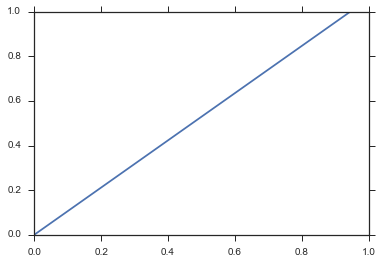

In [225]:
plt.plot(fpr3, tpr3, '-')

In [226]:
auc(fpr3, tpr3)

0.52777777777777779